# News Classification using Naive Bayes classifier

In [1]:
#!pip install wordcloud

In [2]:
import time
start1 = time.time()

In [3]:
import requests
import json
import time
import pandas as pd
import numpy as np
import re
import os
import wordcloud 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.metrics import classification_report,confusion_matrix
import random as rd

In [4]:
url = "https://content.guardianapis.com/search?section=%s&show-fields=body&page=%s&page-size=200&api-key="

In [5]:
key = "" #guardian api key
url = url + key
types=["technology","lifeandstyle","business","sport","culture","environment"]
filename = "news_database.csv"
totalpage = 10 #1Page contains 200 articles
#scrap(type_)

In [6]:
def get_articles(types_):
    if filename in os.listdir("."):
        df_ = pd.read_csv(filename)
        print("file found")
    else:
        print("creating article dataframe...")
        textdata =[]
        label = []
        for typ in types_:
            for k in range(1,totalpage+1): 
                u1 = url % (typ,str(k))
                data = requests.get(u1)
                parsed_data = json.loads(data.text)
                if (parsed_data["response"]["status"] == "ok"):
                    for art in parsed_data["response"]["results"]:
                        textdata.append(art["fields"]["body"])
                        label.append(typ)
                print(len(label))       
                time.sleep(2)
        df_ = pd.DataFrame({'Text': textdata,'Label': label,})
        df_.to_csv(filename, encoding='utf-8')
    return df_

In [7]:
df =  get_articles(types)

file found


In [8]:
#Temizlik bolumu
df = df.replace("(<figure.*?</figure>)",' ', regex=True)
df = df.replace("(<a\sh.*?</a>)",' ', regex=True)
df = df.replace('<[^>]*>', ' ', regex=True)
df = df.replace('â€.', ' ', regex=True)
df = df.replace("[^a-zA-Z]"," ", regex=True)
for i in range(5):
    df = df.replace("\s(\w{1,3})\s",' ', regex=True)

In [9]:
df.Label = pd.Categorical(df.Label)
df['Category'] = df.Label.cat.codes
df.Label.value_counts()

technology      2000
sport           2000
lifeandstyle    2000
environment     2000
culture         2000
business        2000
Name: Label, dtype: int64

In [10]:
if 'filename.csv' not in os.listdir("."):
    df.to_csv("filename.csv", encoding='utf-8')
df.head()

,Unnamed: 0,Text,Label,Category
0,0,World Bank reassuring message those fearful b...,technology,5
1,1,Ryker Price Looking like Trans...,technology,5
2,2,When story told historians hard pressed...,technology,5
3,3,This March Facebook coming under global scru...,technology,5
4,4,Facebook accounts were affected data brea...,technology,5


In [11]:
df['Text']=df['Text'].str.lower()
df['words']=df['Text'].str.split()
df.head()

,Unnamed: 0,Text,Label,Category,words
0,0,world bank reassuring message those fearful b...,technology,5,"[world, bank, reassuring, message, those, fear..."
1,1,ryker price looking like trans...,technology,5,"[ryker, price, looking, like, transformer, cro..."
2,2,when story told historians hard pressed...,technology,5,"[when, story, told, historians, hard, pressed,..."
3,3,this march facebook coming under global scru...,technology,5,"[this, march, facebook, coming, under, global,..."
4,4,facebook accounts were affected data brea...,technology,5,"[facebook, accounts, were, affected, data, bre..."


# Split Data to Train and Test

In [12]:
#Split Test and Training
np.random.RandomState(42)
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3)

In [13]:
train=train.reset_index(drop=True)
test=test.reset_index(drop=True)

In [14]:
train.head()

,Unnamed: 0,Text,Label,Category,words
0,3055,descended house recently throwing family lif...,lifeandstyle,3,"[descended, house, recently, throwing, family,..."
1,1648,free wifi services offered hotels airports ...,technology,5,"[free, wifi, services, offered, hotels, airpor..."
2,11123,pollution inequality between world rich poor...,environment,2,"[pollution, inequality, between, world, rich, ..."
3,1984,british political party will victim hack simi...,technology,5,"[british, political, party, will, victim, hack..."
4,3499,them everywhere kitted form hugging lycra c...,lifeandstyle,3,"[them, everywhere, kitted, form, hugging, lycr..."


In [15]:
test.head()

,Unnamed: 0,Text,Label,Category,words
0,4400,mark carney offer stay sound like desperate a...,business,0,"[mark, carney, offer, stay, sound, like, despe..."
1,10926,romania security forces have mounted series r...,environment,2,"[romania, security, forces, have, mounted, ser..."
2,3377,countryside patrick barkham does ...,lifeandstyle,3,"[countryside, patrick, barkham, does, spring, ..."
3,4803,name blockbuster from beforetimes ...,business,0,"[name, blockbuster, from, beforetimes, appeara..."
4,11609,michael gove become embroiled twitter with ov...,environment,2,"[michael, gove, become, embroiled, twitter, wi..."


In [16]:
test=test.iloc[0:500]

In [17]:
print('Number of Emails')
print ("Train_business      :{}".format(len(train[train.Category==0])))
print ("Train_culture       :{}".format(len(train[train.Category==1])))
print ("Train_environment   :{}".format(len(train[train.Category==2])))
print ("Train_lifeandstyle  :{}".format(len(train[train.Category==3])))
print ("Train_sport         :{}".format(len(train[train.Category==4])))
print ("Train_technology    :{}".format(len(train[train.Category==5])))

print ("Test_business       :{}".format(len(test[test.Category==0])))
print ("Test_culture        :{}".format(len(test[test.Category==1])))
print ("Test_environment    :{}".format(len(test[test.Category==2])))
print ("Test_lifeandstyle   :{}".format(len(test[test.Category==3])))
print ("Test_sport          :{}".format(len(test[test.Category==4])))
print ("Test_technology     :{}".format(len(test[test.Category==5])))

print ("Total               :{}".format(len(df)))

Number of Emails
Train_business      :1400
Train_culture       :1377
Train_environment   :1392
Train_lifeandstyle  :1409
Train_sport         :1418
Train_technology    :1404
Test_business       :73
Test_culture        :78
Test_environment    :101
Test_lifeandstyle   :89
Test_sport          :79
Test_technology     :80
Total               :12000


# Training Data

In [18]:
WORDS = []
for cell in train.words:
    for word in cell:
        WORDS.append(word)
words=pd.DataFrame(WORDS, columns=['word'])
words['count']=1
Words=words.groupby('word', as_index=False).sum().iloc[:,0:2]
#Words=Words[Words['count']>10]
Words.head()

,word,count
0,aaaaaaaaaa,1
1,aaaaaaaaaarghhh,1
2,aaaaaaargh,1
3,aaaaaas,1
4,aaaaand,1


# IDF

In [19]:
Words['idf']=np.log(len(train)/Words['count'])

In [20]:
Words.head()

,word,count,idf
0,aaaaaaaaaa,1,9.035987
1,aaaaaaaaaarghhh,1,9.035987
2,aaaaaaargh,1,9.035987
3,aaaaaas,1,9.035987
4,aaaaand,1,9.035987


In [21]:
businesswords = []
for cell in train[train.Category==0].words:
    for word in cell:
        businesswords.append(word)
words=pd.DataFrame(businesswords, columns=['word'])
words['Appearances in business']=1
businesswords=words.groupby('word', as_index=False).sum().iloc[:,0:2]
#businesswords=businesswords[businesswords['Appearances in business']>5]
businesswords.head()

,word,Appearances in business
0,aabout,1
1,aaron,1
2,aaronovitch,1
3,aaronson,1
4,abandon,28


In [22]:
culturewords = []
for cell in train[train.Category==1].words:
    for word in cell:
        culturewords.append(word)
words=pd.DataFrame(culturewords, columns=['word'])
words['Appearances in culture']=1
culturewords=words.groupby('word', as_index=False).sum().iloc[:,0:2]
#culturewords=culturewords[culturewords['Appearances in culture']>5]
culturewords.head()

,word,Appearances in culture
0,aaaaand,1
1,aacta,2
2,aaliyah,1
3,aamer,1
4,aamir,1


In [23]:
environmentwords = []
for cell in train[train.Category==2].words:
    for word in cell:
        environmentwords.append(word)
words=pd.DataFrame(environmentwords, columns=['word'])
words['Appearances in environment']=1
environmentwords=words.groupby('word', as_index=False).sum().iloc[:,0:2]
#environmentwords=environmentwords[environmentwords['Appearances in environment']>5]
environmentwords.head()

,word,Appearances in environment
0,aadmi,1
1,aarash,1
2,aarhus,8
3,aaron,5
4,abalone,3


In [24]:
lifeandstylewords = []
for cell in train[train.Category==3].words:
    for word in cell:
        lifeandstylewords.append(word)
words=pd.DataFrame(lifeandstylewords, columns=['word'])
words['Appearances in lifeandstyle']=1
lifeandstylewords=words.groupby('word', as_index=False).sum().iloc[:,0:2]
#lifeandstylewords=lifeandstylewords[lifeandstylewords['Appearances in lifeandstyle']>5]
lifeandstylewords.head()

,word,Appearances in lifeandstyle
0,aaaaaaaaaa,1
1,aaaah,1
2,aardvark,2
3,aaron,14
4,aarti,1


In [25]:
sportwords = []
for cell in train[train.Category==4].words:
    for word in cell:
        sportwords.append(word)
words=pd.DataFrame(sportwords, columns=['word'])
words['Appearances in sport']=1
sportwords=words.groupby('word', as_index=False).sum().iloc[:,0:2]
#sportwords=sportwords[sportwords['Appearances in sport']>5]
sportwords.head()

,word,Appearances in sport
0,aaaaaaaaaarghhh,1
1,aaaaaas,1
2,aagh,1
3,aahed,1
4,aahs,2


In [26]:
technologywords = []
for cell in train[train.Category==5].words:
    for word in cell:
        technologywords.append(word)
words=pd.DataFrame(technologywords, columns=['word'])
words['Appearances in technology']=1
technologywords=words.groupby('word', as_index=False).sum().iloc[:,0:2]
#technologywords=technologywords[technologywords['Appearances in technology']>5]
technologywords.head()

,word,Appearances in technology
0,aaaaaaargh,1
1,aaaagh,1
2,aaah,1
3,aaargh,2
4,aabel,1


In [27]:
merged1 = pd.merge(Words,businesswords, on='word', how='outer')
merged2=pd.merge(merged1,culturewords, on='word', how='outer')
merged3=pd.merge(merged2,environmentwords, on='word', how='outer')
merged4=pd.merge(merged3,lifeandstylewords, on='word', how='outer')
merged5=pd.merge(merged4,sportwords, on='word', how='outer')
merged6=pd.merge(merged5,technologywords, on='word', how='outer')
Words=merged6.fillna(0)
Words.head()

,word,count,idf,Appearances in business,Appearances in culture,Appearances in environment,Appearances in lifeandstyle,Appearances in sport,Appearances in technology
0,aaaaaaaaaa,1,9.035987,0.0,0.0,0.0,1.0,0.0,0.0
1,aaaaaaaaaarghhh,1,9.035987,0.0,0.0,0.0,0.0,1.0,0.0
2,aaaaaaargh,1,9.035987,0.0,0.0,0.0,0.0,0.0,1.0
3,aaaaaas,1,9.035987,0.0,0.0,0.0,0.0,1.0,0.0
4,aaaaand,1,9.035987,0.0,1.0,0.0,0.0,0.0,0.0


In [28]:
Words=Words[Words.idf>0]

In [29]:
Words=Words[Words['count']>10]

# TF-IDF

In [30]:
#X=Words[['Appearances in business','Appearances in culture', 'Appearances in environment','Appearances in lifeandstyle','Appearances in sport','Appearances in technology']].multiply(Words["idf"], axis="index")

In [31]:
#X['word']=Words['word']
#X['count']=Words['count']
#Words=X

In [32]:
#Words.head()

# Classification Process

In [33]:
Words['P(W|Buss)']=(Words['Appearances in business'])/(businesswords['Appearances in business'].sum())+0.1/Words['count'].sum()
Words['P(W|Cult)']=(Words['Appearances in culture'])/(culturewords['Appearances in culture'].sum())+0.1/Words['count'].sum()
Words['P(W|Env)']=(Words['Appearances in environment'])/(environmentwords['Appearances in environment'].sum())+0.1/Words['count'].sum()
Words['P(W|LifStd)']=(Words['Appearances in lifeandstyle'])/(lifeandstylewords['Appearances in lifeandstyle'].sum())+0.1/Words['count'].sum()
Words['P(W|Sport)']=(Words['Appearances in sport'])/(sportwords['Appearances in sport'].sum())+0.1/Words['count'].sum()
Words['P(W|Tech)']=(Words['Appearances in technology'])/(technologywords['Appearances in technology'].sum())+0.1/Words['count'].sum()
Words.head()

,word,count,idf,Appearances in business,Appearances in culture,Appearances in environment,Appearances in lifeandstyle,Appearances in sport,Appearances in technology,P(W|Buss),P(W|Cult),P(W|Env),P(W|LifStd),P(W|Sport),P(W|Tech)
22,aami,11,6.638092,0.0,0.0,0.0,0.0,11.0,0.0,3.061291e-08,3.061291e-08,3.061291e-08,3.061291e-08,0.000011,3.061291e-08
31,aaron,109,4.344639,1.0,12.0,5.0,14.0,72.0,5.0,1.349427e-06,1.856893e-05,8.760791e-06,2.757904e-05,0.000073,7.583757e-06
42,aback,14,6.396930,0.0,2.0,0.0,7.0,2.0,3.0,3.061291e-08,3.120332e-06,3.061291e-08,1.380483e-05,0.000002,4.562499e-06
48,abandon,92,4.514198,28.0,11.0,13.0,11.0,20.0,9.0,3.695741e-05,1.702407e-05,2.272908e-05,2.167580e-05,0.000020,1.362627e-05
49,abandoned,194,3.768129,33.0,33.0,46.0,22.0,45.0,15.0,4.355148e-05,5.101098e-05,8.034825e-05,4.332100e-05,0.000045,2.269004e-05


In [34]:
import time
start2 = time.time()
arr = ['P(W|Buss)','P(W|Cult)', 'P(W|Env)','P(W|LifStd)', 'P(W|Sport)', 'P(W|Tech)']
arr2 = ['log(P(wi|Buss))','log(P(wi|Cult))', 'log(P(wi|Env))','log(P(wi|LifStd))', 'log(P(wi|Sport))', 'log(P(wi|Tech))']
for p,p2 in zip(arr,arr2):
    Y=[]
    for i in range (0, len(test)):
        Y.append((pd.DataFrame(test.words[i], columns=['word'])))  
    A=[]
    for i in range(len(test)):
        A.append([np.array(Words[Words.word==wrds][p]) for wrds in Y[i].word])
    ZZ=[]
    for i in range (0, len(test)):
        ZZ.append(np.log(pd.DataFrame(A[i]).iloc[1:,]).dropna().sum())
    test[p2]=pd.DataFrame(ZZ)
end2 = time.time()
print("time (s) : {:.4f}".format(end2 - start2))

time (s) : 6528.4144


In [35]:
test.head()

,Unnamed: 0,Text,Label,Category,words,log(P(wi|Buss)),log(P(wi|Cult)),log(P(wi|Env)),log(P(wi|LifStd)),log(P(wi|Sport)),log(P(wi|Tech))
0,4400,mark carney offer stay sound like desperate a...,business,0,"[mark, carney, offer, stay, sound, like, despe...",-1291.619552,-1372.255165,-1389.793101,-1397.703253,-1409.098479,-1360.221880
1,10926,romania security forces have mounted series r...,environment,2,"[romania, security, forces, have, mounted, ser...",-2417.418293,-2504.248538,-2307.967083,-2564.397852,-2721.002640,-2447.485691
2,3377,countryside patrick barkham does ...,lifeandstyle,3,"[countryside, patrick, barkham, does, spring, ...",-7949.011449,-7220.498377,-7583.662117,-7177.570643,-7707.589284,-7857.034063
3,4803,name blockbuster from beforetimes ...,business,0,"[name, blockbuster, from, beforetimes, appeara...",-1807.287642,-1693.970944,-1853.226109,-1715.501557,-1813.334429,-1711.724248
4,11609,michael gove become embroiled twitter with ov...,environment,2,"[michael, gove, become, embroiled, twitter, wi...",-1860.439818,-2015.195762,-1722.669945,-1925.593743,-2056.441882,-1978.825582


In [36]:
test['max']=test.iloc[:,5:11].max(axis=1)
test=test.dropna()

In [37]:
test=test[test['max']<0]

In [38]:
test=test.reset_index(drop=True)

In [39]:
label=[]
for i in range (0, len(test)):
        if test['log(P(wi|Buss))'][i]==test['max'][i]:
            label.append(0)
        if test['log(P(wi|Cult))'][i]==test['max'][i]:
            label.append(1)
        if test['log(P(wi|Env))'][i]==test['max'][i]:
            label.append(2)
        if test['log(P(wi|LifStd))'][i]==test['max'][i]:
            label.append(3)
        if test['log(P(wi|Sport))'][i]==test['max'][i]:
            label.append(4)
        if test['log(P(wi|Tech))'][i]==test['max'][i]:
            label.append(5)
test['predict_label']=label

Accuracy : %89.2929


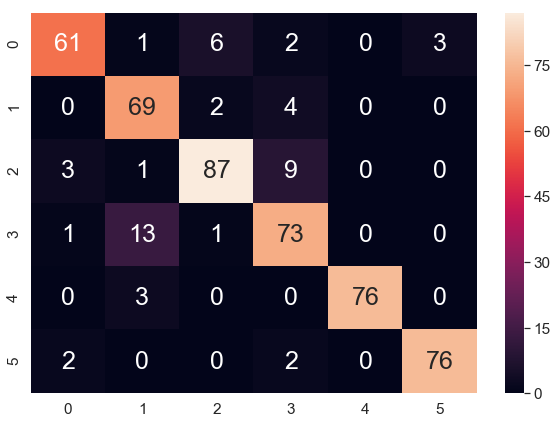

In [43]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = confusion_matrix(test['Category'], test['predict_label'])
df_cm = pd.DataFrame(array, range(6),range(6))
(df_cm)
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 25}, fmt="d")# font size
print ("Accuracy : %{:.4f}".format(((array[0][0]+array[1][1]+array[2][2]+array[3][3]+array[4][4]+array[5][5])/len(test))*100))

In [44]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test['Category'], test['predict_label']))

             precision    recall  f1-score   support

          0       0.91      0.84      0.87        73
          1       0.79      0.92      0.85        75
          2       0.91      0.87      0.89       100
          3       0.81      0.83      0.82        88
          4       1.00      0.96      0.98        79
          5       0.96      0.95      0.96        80

avg / total       0.90      0.89      0.89       495

